# Analisando os dados - Titanic



## INTRODUÇÃO:
"O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Foi a segunda embarcação da Classe Olympic de transatlânticos depois do RMS Olympic e seguido pelo HMHS Britannic. Projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews, sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".

A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte com mais de 1 500 pessoas a bordo, sendo um dos maiores desastres marítimos em tempos de paz de toda a história. Seu naufrágio destacou vários pontos fracos de seu projeto, deficiências nos procedimentos de evacuação de emergência e falhas nas regulamentações marítimas da época. Comissões de inquérito foram instauradas nos Estados Unidos e no Reino Unido, levando a mudanças nas leis internacionais de navegação que permanecem em vigor mais de um século depois." 
<[fonte](https://pt.wikipedia.org/wiki/RMS_Titanic)>



## Perguntas

* Quais foram os fatores que fizeram com que algumas pessoas fossem mais propens as a sobreviver ?
    1. A Classe da passagem adquirida, teve alguma importância para que tivesse mais sobreviventes de determinada classe ?
    2. A cabine em que os passageiros estavam, teve alguma relevância para que houvesse mais sobreviventes ?
    3. Teve mais sobreviventes mulheres mulheres ou homens ?
    4. A idade das pessoas teve alguma relevância, em relação aos sobreviventes ?

### Importando bibliotescas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
    
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

vcolor  = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:gray', 'tab:pink', 'tab:olive', 'tab:cyan']
vcolor2 = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:gray', 'tab:pink', 'tab:olive', 'tab:cyan']

### Defininco arquivo


In [2]:
df = pd.read_csv('titanic-data-6.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


### Renomeando colunas
A renomeação das colunas servira para ficar mais simples a legibilidade dos dados e para evitar posiveis confuçoes .

In [3]:
df.rename(columns={
    "Survived":"Sobreviveu",
    "Pclass":"Classe",
    "Sex":"Sexo",
    "Age":"Idade",
    "SibSp":"Irmãos/Conjuges",
    "Parch":"Pais/Crianças ",
    "Ticket":"Bilhete",
    "Fare":"Tarifa",
    "Cabin":"Cabine",
    "Embarked":"Embarque",
    "name":"Nome"
}, inplace=True)
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.head()

,passengerid,sobreviveu,classe,name,sexo,idade,irmãos/conjuges,pais/crianças,bilhete,tarifa,cabine,embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [5]:
df['nao_sobreviveu'] = df['sobreviveu'].map({0:1, 1: 0})

#### Relação de sobreviventes 
Primeiro veremos a porcentagem de sobreviventes do titanic

Text(0, 0.5, '')

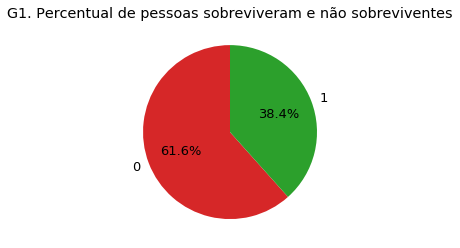

In [8]:
df['sobreviveu'].value_counts().plot.pie(colors=('tab:red', 'tab:green'),
                                        title='G1. Percentual de pessoas sobreviveram e não sobreviventes',
                                        fontsize=13, shadow=False, startangle=90, autopct='%1.1f%%',
                                        figsize=(6,4)).set_ylabel('')

Text(0, 0.5, 'Quantidade')

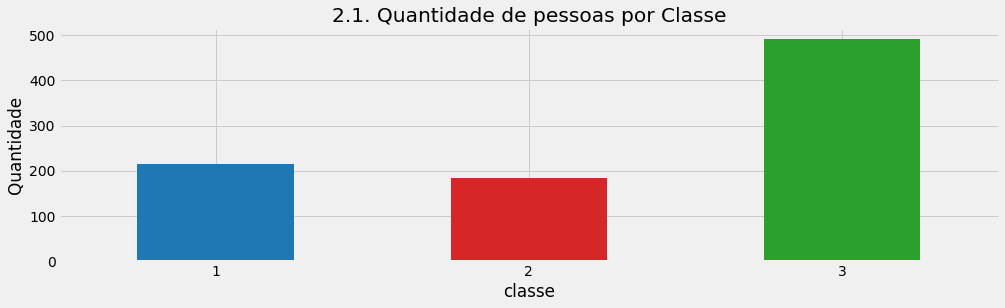

In [56]:
df.pivot_table(index='classe',  values='name', aggfunc='count').plot(kind='bar',
                                                                     color=('tab:blue', 'tab:red', 'tab:green'),
                                                                     title="2.1. Quantidade de pessoas por Classe", 
                                                                     legend=None,
                                                                     figsize=(15,4),
                                                                     rot=0).set_xlabel('classe')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

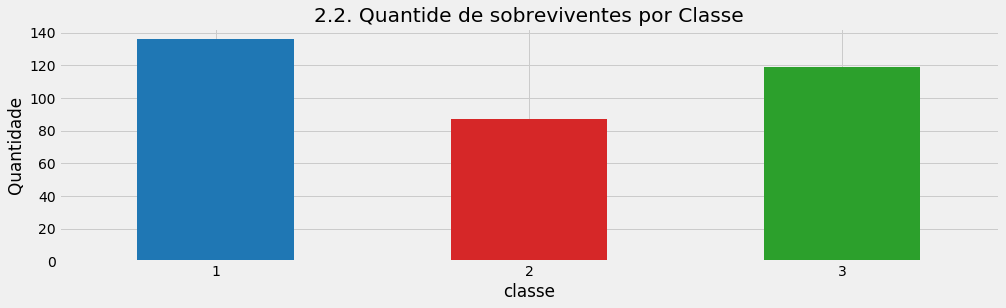

In [57]:
df.query('sobreviveu == 1').groupby('classe').sum()['sobreviveu'].plot(kind='bar',
                                                                       color=vcolor,
                                                                       title="2.2. Quantide de sobreviventes por Classe", 
                                                                       legend=None,
                                                                       figsize=(15,4),
                                                                       rot=0).set_xlabel('classe')
plt.ylabel('Quantidade')

Text(0, 0.5, '')

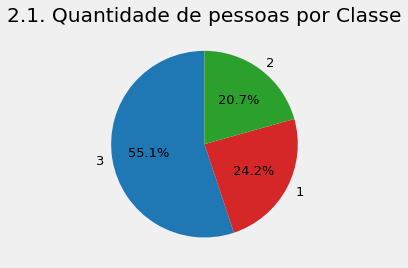

In [58]:
df['classe'].value_counts().plot.pie(colors=('tab:blue', 'tab:red', 'tab:green'),
                                        title='2.1. Quantidade de pessoas por Classe',
                                        fontsize=13, shadow=False, startangle=90, autopct='%1.1f%%',
                                        figsize=(6,4)).set_ylabel('')

Text(0, 0.5, '')

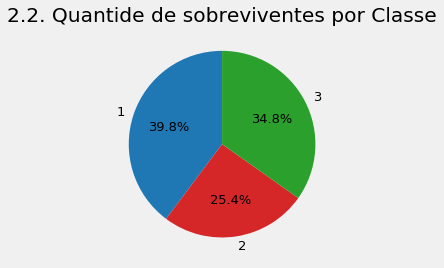

In [67]:
df.query('sobreviveu == 1').groupby('classe').sum()['sobreviveu'].plot.pie(colors=('tab:blue', 'tab:red', 'tab:green'),
                                        title='2.2. Quantide de sobreviventes por Classe',
                                        fontsize=13, shadow=False, startangle=90, autopct='%1.1f%%',
                                        figsize=(6,4)).set_ylabel('')

Text(0, 0.5, 'Quantidade')

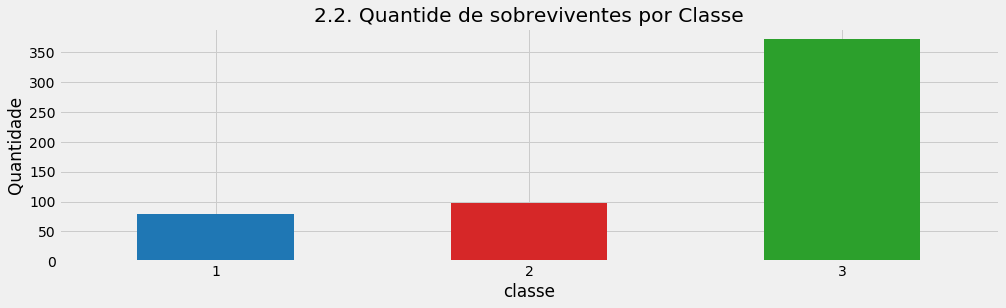

In [66]:
df.query('nao_sobreviveu == 1').groupby('classe').sum()['nao_sobreviveu'].plot(kind='bar',
                                                                       color=vcolor,
                                                                       title="2.3. Quantide de vitimas fatais por Classe", 
                                                                       legend=None,
                                                                       figsize=(15,4),
                                                                       rot=0).set_xlabel('classe')
plt.ylabel('Quantidade')

Text(0, 0.5, '')

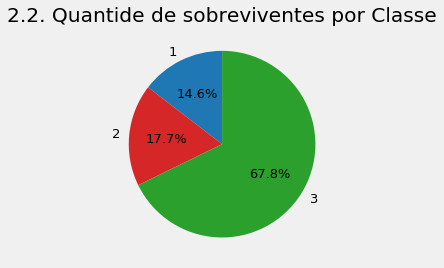

In [68]:
df.query('nao_sobreviveu == 1').groupby('classe').sum()['nao_sobreviveu'].plot.pie(colors=('tab:blue', 'tab:red', 'tab:green'),
                                        title='2.3. Quantide de vitimas fatais por Classe',
                                        fontsize=13, shadow=False, startangle=90, autopct='%1.1f%%',
                                        figsize=(6,4)).set_ylabel('')

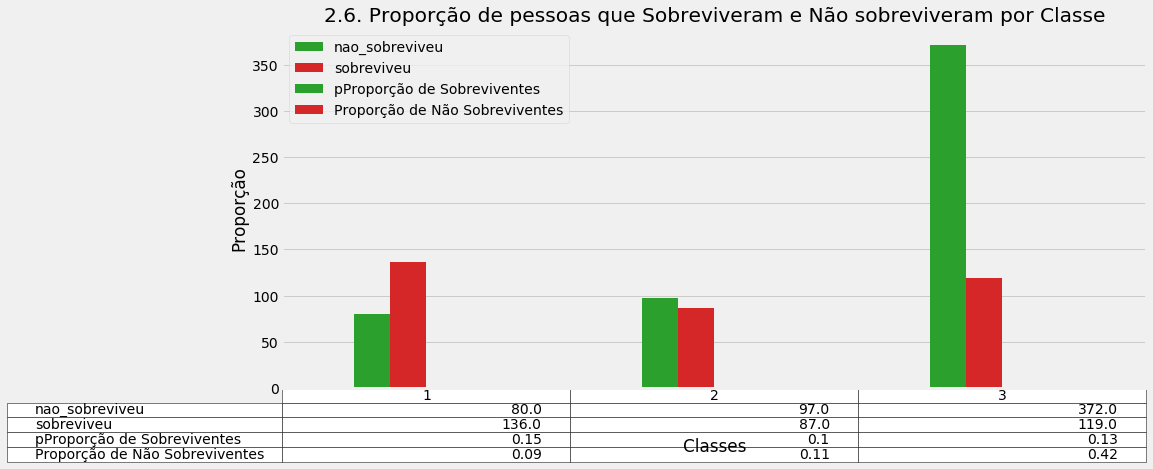

In [69]:
df_prop = df.pivot_table(index='classe',  values=('sobreviveu','nao_sobreviveu'), aggfunc=np.sum)
df_prop['pProporção de Sobreviventes'] = df_prop['sobreviveu'] / df['passengerid'].count()
df_prop['Proporção de Não Sobreviventes'] = df_prop['nao_sobreviveu'] / df['passengerid'].count()
df_prop.round(2).plot(kind='bar', rot=0, color=('tab:green','tab:red'),
              title='2.6. Proporção de pessoas que Sobreviveram e Não sobreviveram por Classe',
              table=True)
plt.ylabel('Proporção')
plt.xlabel('Classes', labelpad=50)
plt.xticks([])
plt.axes().set_position([0.15, 0.30, 0.80, 1.0]) # set_position([left, bottom, width, height])